<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

## Precisão e acurácia

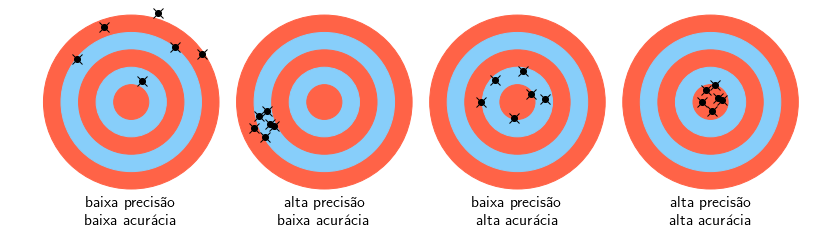

In [25]:
from operator import add, mul
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

cor_circulo = ['tomato', 'lightskyblue']
cor_dardo = 'black'

circulo_lista = [plt.Circle((2.2*j,0), 0.2 + 0.2*(4-i), color=cor_circulo[i%2]) for i in range(5) for j in range(4)]        
        
dardos_jogada = [[-0.1,0], [-0.05,0.14], [0.02,-0.1], [0.05,0.2], [0.13,0.02], [0.08,0.05]]

dardos_todos = [list(map(add, map(mul, dardo, [6.2,2.6]), [0,0.5])) for dardo in dardos_jogada]
dardos_todos = list(map(add, dardos_todos, [list(map(add, dardo, [1.5,-0.3])) for dardo in dardos_jogada]))
dardos_todos = list(map(add, dardos_todos, [list(map(add, map(mul, dardo, [3.2,1.8]), [4.3,0.0])) 
                                            for dardo in dardos_jogada]))
dardos_todos = list(map(add, dardos_todos, [list(map(add, dardo, [6.6,0])) for dardo in dardos_jogada]))

for circulo in circulo_lista:
    plt.gcf().gca().add_artist(circulo)

for dardo in dardos_todos:
    plt.plot(*dardo, color=cor_dardo, marker = 'o', markersize='6')
    plt.plot(*dardo, color=cor_dardo, marker = 'x', markersize='10')

plt.annotate('baixa precisão\n baixa acurácia', xy=(0, -1.4), ha='center', fontsize=16)
plt.annotate('alta precisão\n baixa acurácia', xy=(2.2, -1.4), ha='center', fontsize=16)
plt.annotate('baixa precisão\n alta acurácia', xy=(4.4, -1.4), ha='center', fontsize=16)
plt.annotate('alta precisão\n alta acurácia', xy=(6.6, -1.4), ha='center', fontsize=16)
    
plt.xlim(-1.1,7.8)
plt.ylim(-1.4,1.1)
plt.axis('off')

plt.savefig('precisao_e_acuracia.png', dpi=150)

plt.show()

## Média, valor esperado e desvio padrão

Gerando os dados

In [13]:
import numpy as np
import scipy.stats as stats
import math

# define semente para fixar os dados do histograma
np.random.seed(14736122)

N=1000

mu = 3
variance = 0.2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, N)
y = stats.norm.pdf(x, mu, sigma)
mostra = np.random.normal(mu, sigma, N)

x_avg = np.mean(mostra)

print(x_avg)

2.973798044183934


Criando o histograma com [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html):

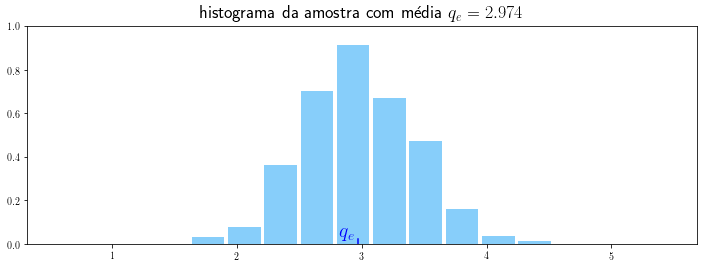

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.rc('text', usetex=True)

cor_hist = 'lightskyblue'
cor_linhas_hist = 'blue'

n, bins, patches = plt.hist(mostra, density=True, rwidth = 0.9, color=cor_hist)

plt.plot([x_avg,x_avg], [0,0.02], color=cor_linhas_hist)
plt.annotate(r'$q_e$', xy=(mu-0.06,0.02), color=cor_linhas_hist, ha='right', fontsize=20)

plt.xlim(mu-6*sigma, mu+6*sigma)
plt.ylim(0,1)

plt.title('histograma da amostra com média $q_e = '+str(round(1000*x_avg)/1000)+'$', fontsize=18)
plt.savefig('histograma.png', bbox_inches='tight', pad_inches=0.2,  dpi=150)

plt.show()

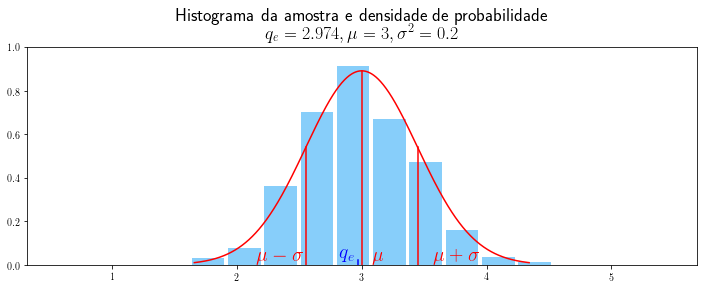

In [51]:
plt.figure(figsize=(12,4))

cor_densidade = 'red'
cor_linhas_densidade = 'red'

plt.plot(x, y, color=cor_densidade)

n, bins, patches = plt.hist(mostra, density=True, rwidth = 0.9, color=cor_hist)

plt.plot([x_avg,x_avg], [0,0.02], color=cor_linhas_hist)
plt.annotate(r'$q_e$', xy=(mu-0.06,0.02), color=cor_linhas_hist, ha='right', fontsize=20)

plt.plot([mu,mu], [0,y[int(N/2)]], color=cor_linhas_densidade)
plt.annotate(r'$\mu$', xy=(mu+0.08,0.02), color=cor_linhas_densidade, ha='left', fontsize=20)

plt.plot([mu-sigma,mu-sigma], [0,y[int(N/3)]], color=cor_linhas_densidade)
plt.annotate(r'$\mu - \sigma$', xy=(mu-sigma-0.02,0.02), color=cor_linhas_densidade, ha='right', fontsize=20)

plt.plot([mu+sigma,mu+sigma], [0,y[int(2*N/3)]], color=cor_linhas_densidade)
plt.annotate(r'$\mu + \sigma$', xy=(mu+sigma+0.12,0.02), color=cor_linhas_densidade, ha='left', fontsize=20)

plt.xlim(mu-6*sigma, mu+6*sigma)
plt.ylim(0,1)

title_str = 'Histograma da amostra e densidade de probabilidade\n $q_e = '+str(round(1000*x_avg)/1000)+', \mu = '+str(mu)+', \sigma^2 = '+str(variance)+'$'
plt.title(title_str, fontsize=18)
plt.savefig('histograma_com_distribuicao.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

plt.show()

## Barras de erro

Usamos [matplotlib.pyplot.errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html)

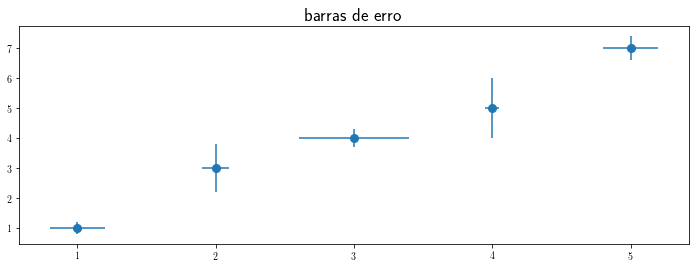

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# dados sintéticos
x = [1,2,3,4,5]
y = [1,3,4,5,7]

# erros sintéticos
xerr = [0.2, 0.1,0.4,0.05,0.2]
yerr = [0.2, 0.8,0.3,1,0.4]

# figura
plt.figure(figsize=(12,4))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', markersize=8, linestyle='none')
plt.title("barras de erro", fontsize=18)

plt.savefig('barras_de_erro.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

plt.show()